
# Data analysis [Correlation & Distribution]

In [2]:
%load_ext autotime
%matplotlib inline

In [3]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import joblib
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re

time: 6.39 s


In [4]:
# Reading the data
data =  pd.read_csv('../../Data/SimpleApproach/Exports/DataExports.csv')
data

,refYear,reporterCode,partnerCode,distw_harmonic,contig,gdp_o,gdp_d,gdpcap_o,gdpcap_d,pop_o,...,wto_o,wto_d,refMonth,partner2Code,cmdCode,primaryValue,2HScmdCode,4HScmdCode,pci,density
0,2016,12.0,4.0,5758.0,0.0,1.560796e+08,1.946902e+07,3.844,0.562,40606.052,...,0.0,1.0,7,0,852352,90.962,85,8523,1.861445,0.010339
1,2016,12.0,36.0,16444.0,0.0,1.560796e+08,1.204616e+09,3.844,49.928,40606.052,...,0.0,1.0,7,0,852352,83.845,85,8523,1.861445,0.010339
2,2016,12.0,40.0,1693.0,0.0,1.560796e+08,3.864278e+08,3.844,44.177,40606.052,...,0.0,1.0,6,0,852352,74.946,85,8523,1.861445,0.010339
3,2016,12.0,51.0,3587.0,0.0,1.560796e+08,1.054733e+07,3.844,3.606,40606.052,...,0.0,1.0,5,0,852352,74.617,85,8523,1.861445,0.010339
4,2016,12.0,56.0,1628.0,0.0,1.560796e+08,4.663657e+08,3.844,41.096,40606.052,...,0.0,1.0,9,0,852352,111.245,85,8523,1.861445,0.010339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102321939,2019,894.0,834.0,1380.0,1.0,2.330867e+07,6.113687e+07,1.305,1.054,17861.034,...,1.0,1.0,8,0,220890,277.000,22,2208,-0.189242,0.054334
102321940,2019,894.0,834.0,1380.0,1.0,2.330867e+07,6.113687e+07,1.305,1.054,17861.034,...,1.0,1.0,8,0,870710,1076.000,87,8707,3.884524,0.027991
102321941,2019,894.0,834.0,1380.0,1.0,2.330867e+07,6.113687e+07,1.305,1.054,17861.034,...,1.0,1.0,8,0,930621,10111.000,93,9306,1.961242,0.031797
102321942,2019,894.0,834.0,1380.0,1.0,2.330867e+07,6.113687e+07,1.305,1.054,17861.034,...,1.0,1.0,9,0,283531,294.000,28,2835,1.207237,0.036452


time: 2min 40s


In [5]:
data.columns

Index(['refYear', 'reporterCode', 'partnerCode', 'distw_harmonic', 'contig',
       'gdp_o', 'gdp_d', 'gdpcap_o', 'gdpcap_d', 'pop_o', 'pop_d', 'wto_o',
       'wto_d', 'refMonth', 'partner2Code', 'cmdCode', 'primaryValue',
       '2HScmdCode', '4HScmdCode', 'pci', 'density'],
      dtype='object')

time: 2.24 ms


In [6]:
# Check for null values in the DataFrame
data.isnull().sum()

refYear           0
reporterCode      0
partnerCode       0
distw_harmonic    0
contig            0
gdp_o             0
gdp_d             0
gdpcap_o          0
gdpcap_d          0
pop_o             0
pop_d             0
wto_o             0
wto_d             0
refMonth          0
partner2Code      0
cmdCode           0
primaryValue      0
2HScmdCode        0
4HScmdCode        0
pci               0
density           0
dtype: int64

time: 4.51 s


In [7]:
# Remove null values in the DataFrame
data.dropna(inplace=True)

time: 13.2 s


In [8]:
len(data.partnerCode.unique())

198

time: 626 ms


In [9]:
len(data.reporterCode.unique())

135

time: 480 ms


In [10]:
len(data.cmdCode.unique())

5198

time: 404 ms


In [11]:
data.shape

(102321944, 21)

time: 2.07 ms


In [12]:
data.columns

Index(['refYear', 'reporterCode', 'partnerCode', 'distw_harmonic', 'contig',
       'gdp_o', 'gdp_d', 'gdpcap_o', 'gdpcap_d', 'pop_o', 'pop_d', 'wto_o',
       'wto_d', 'refMonth', 'partner2Code', 'cmdCode', 'primaryValue',
       '2HScmdCode', '4HScmdCode', 'pci', 'density'],
      dtype='object')

time: 26.1 ms


# 1. Correlation

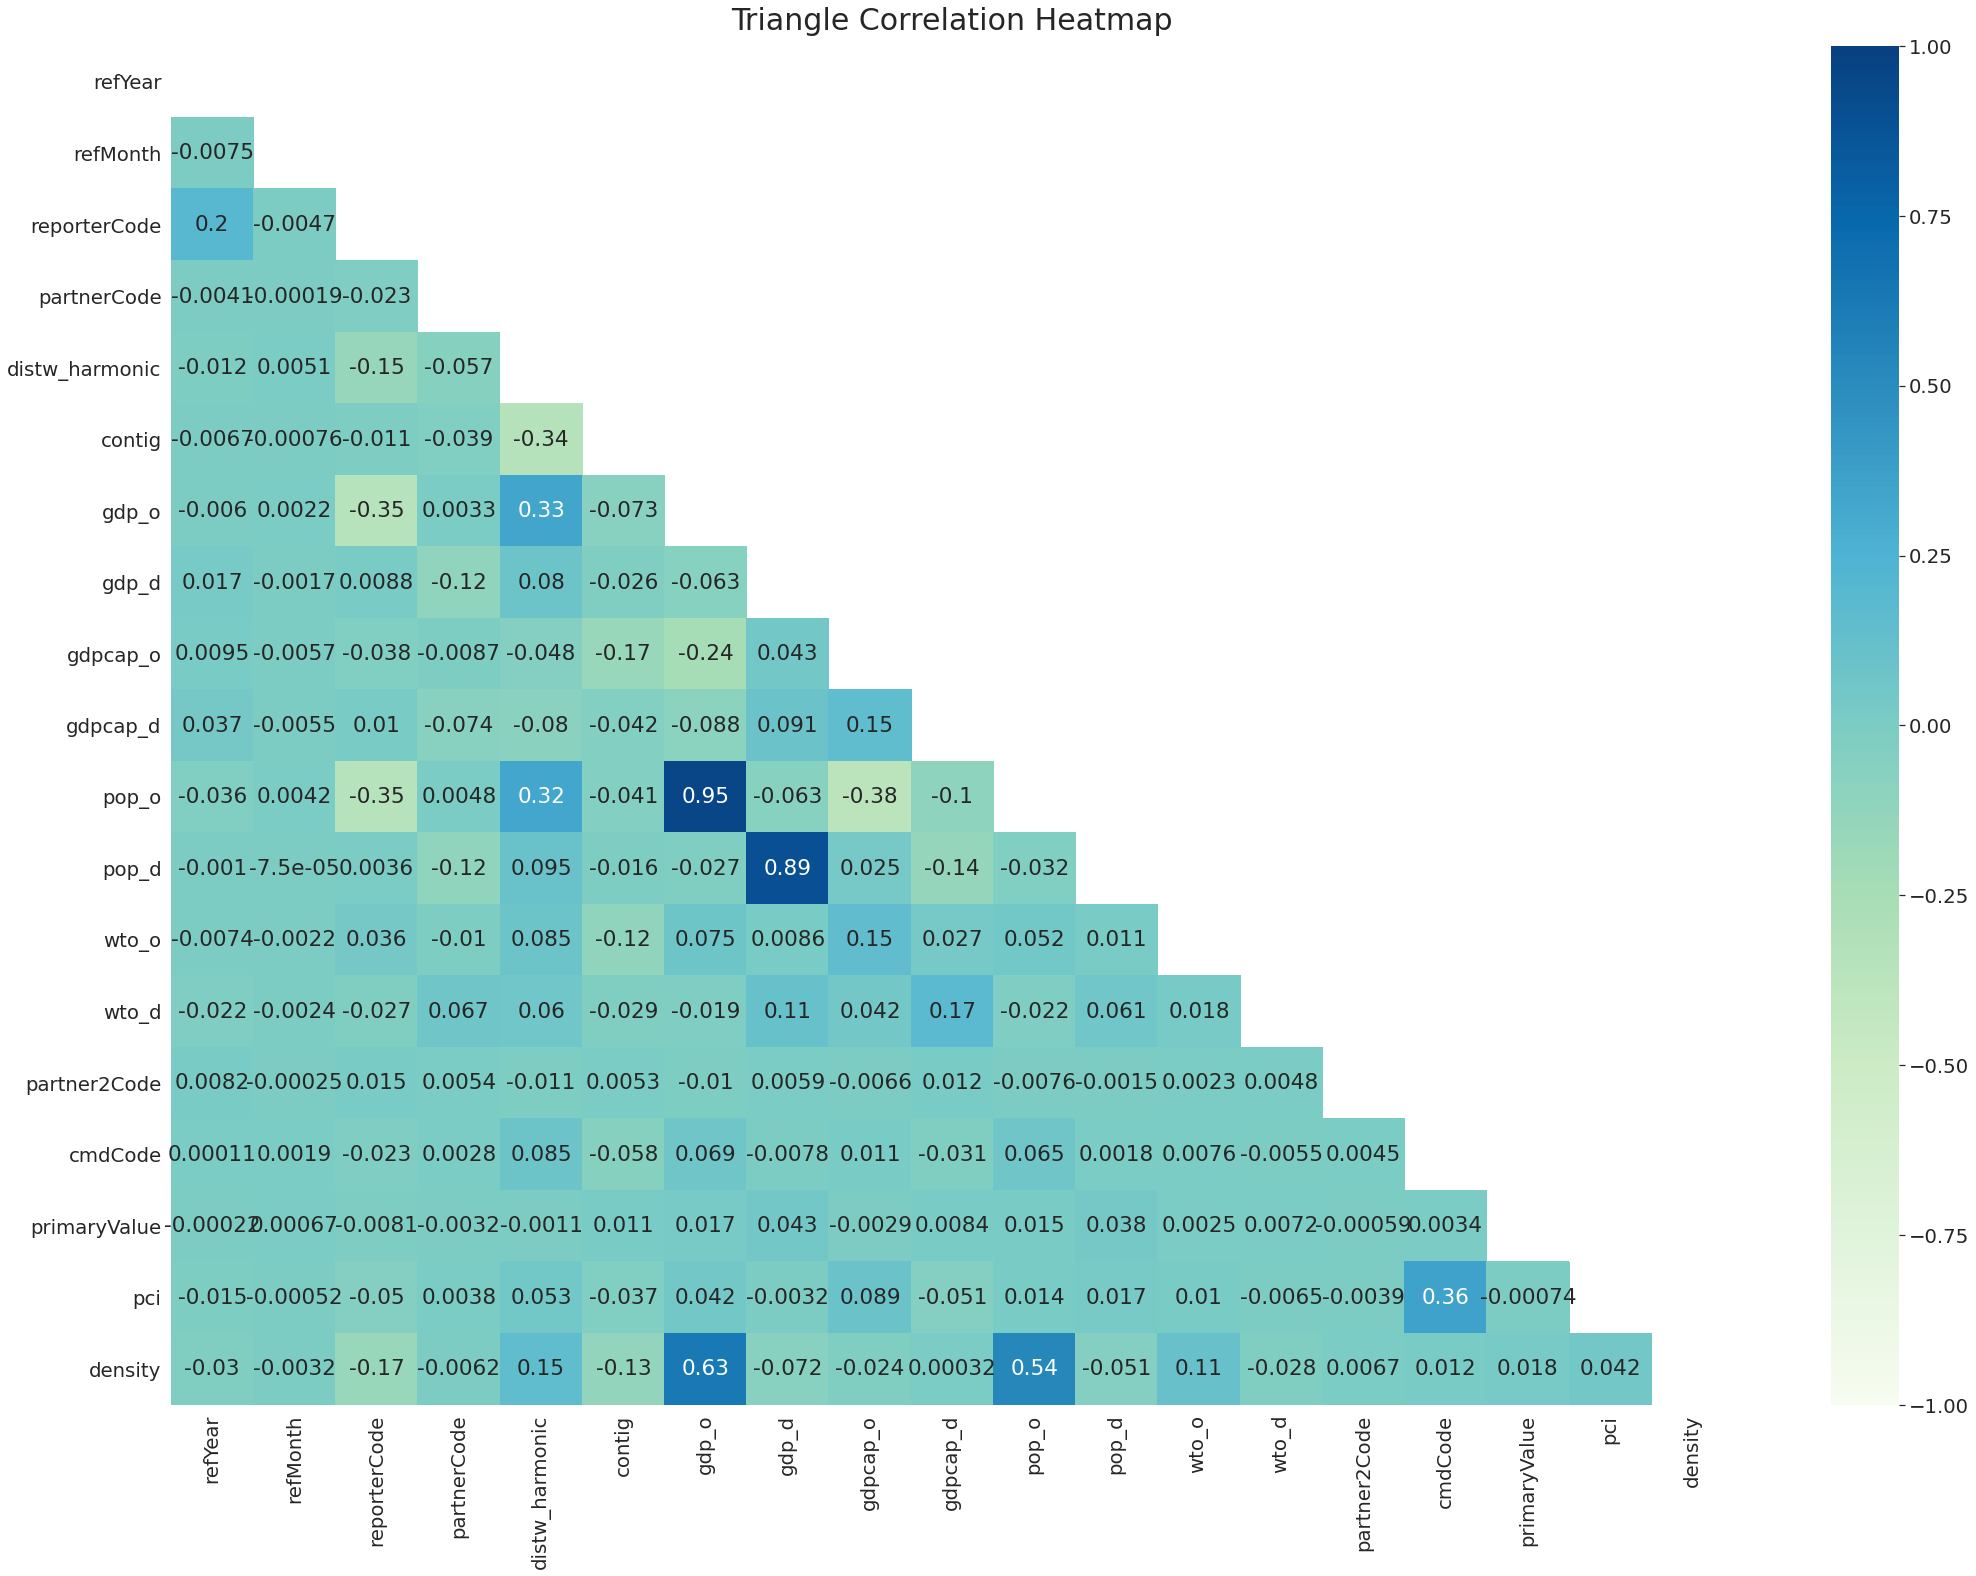

time: 1min 30s


In [13]:
plt.rcParams["figure.figsize"] = (35,25)
corr_matrix = data[['refYear','refMonth', 'reporterCode', 'partnerCode', 'distw_harmonic', 'contig',
       'gdp_o', 'gdp_d', 'gdpcap_o', 'gdpcap_d', 'pop_o', 'pop_d', 'wto_o',
       'wto_d',  'partner2Code', 'cmdCode', 'primaryValue', 'pci', 'density']].corr()
sn.set(font_scale=1.8)
ax = plt.axes()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax.set_facecolor("white")
heatmap = sn.heatmap(corr_matrix, annot=True, mask=mask, vmin=-1, vmax=1, cmap='GnBu')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':30}, pad=16)
plt.show()

In [16]:
corr_matrix

,refYear,refMonth,reporterCode,partnerCode,distw_harmonic,contig,gdp_o,gdp_d,gdpcap_o,gdpcap_d,pop_o,pop_d,wto_o,wto_d,partner2Code,cmdCode,primaryValue,pci,density
refYear,1.000000,-0.007494,0.195560,-0.004055,-0.012235,-0.006696,-0.006001,0.017202,0.009506,0.036678,-0.036140,-0.001026,-0.007364,-0.022122,0.008198,0.000106,-0.000222,-0.015002,-0.030413
refMonth,-0.007494,1.000000,-0.004711,-0.000188,0.005074,-0.000761,0.002231,-0.001668,-0.005677,-0.005539,0.004166,-0.000075,-0.002217,-0.002443,-0.000247,0.001919,0.000672,-0.000516,-0.003236
reporterCode,0.195560,-0.004711,1.000000,-0.023019,-0.150964,-0.011359,-0.354809,0.008751,-0.037736,0.010270,-0.345222,0.003627,0.036116,-0.027111,0.015155,-0.023310,-0.008148,-0.049552,-0.168895
partnerCode,-0.004055,-0.000188,-0.023019,1.000000,-0.056913,-0.038557,0.003315,-0.123274,-0.008684,-0.074134,0.004822,-0.121518,-0.010341,0.066605,0.005391,0.002830,-0.003212,0.003830,-0.006168
distw_harmonic,-0.012235,0.005074,-0.150964,-0.056913,1.000000,-0.341287,0.333935,0.080499,-0.048216,-0.080151,0.322064,0.095228,0.084627,0.060205,-0.010514,0.084801,-0.001060,0.053467,0.153818
contig,-0.006696,-0.000761,-0.011359,-0.038557,-0.341287,1.000000,-0.072525,-0.025718,-0.169145,-0.042218,-0.040848,-0.015564,-0.117761,-0.029172,0.005274,-0.057615,0.011405,-0.036663,-0.128185
gdp_o,-0.006001,0.002231,-0.354809,0.003315,0.333935,-0.072525,1.000000,-0.063123,-0.236673,-0.088178,0.954813,-0.026549,0.075127,-0.018614,-0.009985,0.069047,0.017119,0.042024,0.626107
gdp_d,0.017202,-0.001668,0.008751,-0.123274,0.080499,-0.025718,-0.063123,1.000000,0.043229,0.090592,-0.062917,0.893957,0.008619,0.112477,0.005945,-0.007797,0.043107,-0.003180,-0.071829
gdpcap_o,0.009506,-0.005677,-0.037736,-0.008684,-0.048216,-0.169145,-0.236673,0.043229,1.000000,0.151314,-0.375618,0.025061,0.147925,0.041817,-0.006559,0.011456,-0.002906,0.089093,-0.023820
gdpcap_d,0.036678,-0.005539,0.010270,-0.074134,-0.080151,-0.042218,-0.088178,0.090592,0.151314,1.000000,-0.102962,-0.138767,0.027356,0.172747,0.012008,-0.031160,0.008411,-0.050995,0.000321


time: 35.2 ms


In [17]:
# Create a mask for the lower triangular portion of the correlation matrix
mask = np.tril(np.ones(corr_matrix.shape)).astype(bool)
# Apply the mask to the correlation matrix to mask the lower triangular portion
masked_corr_matrix = corr_matrix.mask(mask)
# Unstack the correlation matrix and reset the index
corr = masked_corr_matrix.unstack().reset_index()
corr.columns = ['feature_1','feature_2','corr'] #rename columns to something readable
corr[ corr['corr'].abs() > 0.2 ][corr['feature_1']!=corr['feature_2']].sort_values('corr')

/export/home/chouno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,feature_1,feature_2,corr
198,pop_o,gdpcap_o,-0.375618
116,gdp_o,reporterCode,-0.354809
192,pop_o,reporterCode,-0.345222
99,contig,distw_harmonic,-0.341287
158,gdpcap_o,gdp_o,-0.236673
194,pop_o,distw_harmonic,0.322064
118,gdp_o,distw_harmonic,0.333935
338,pci,cmdCode,0.357374
352,density,pop_o,0.535782
348,density,gdp_o,0.626107


time: 21.7 ms


# 2. Distribution

/export/home/chouno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  app.launch_new_instance()


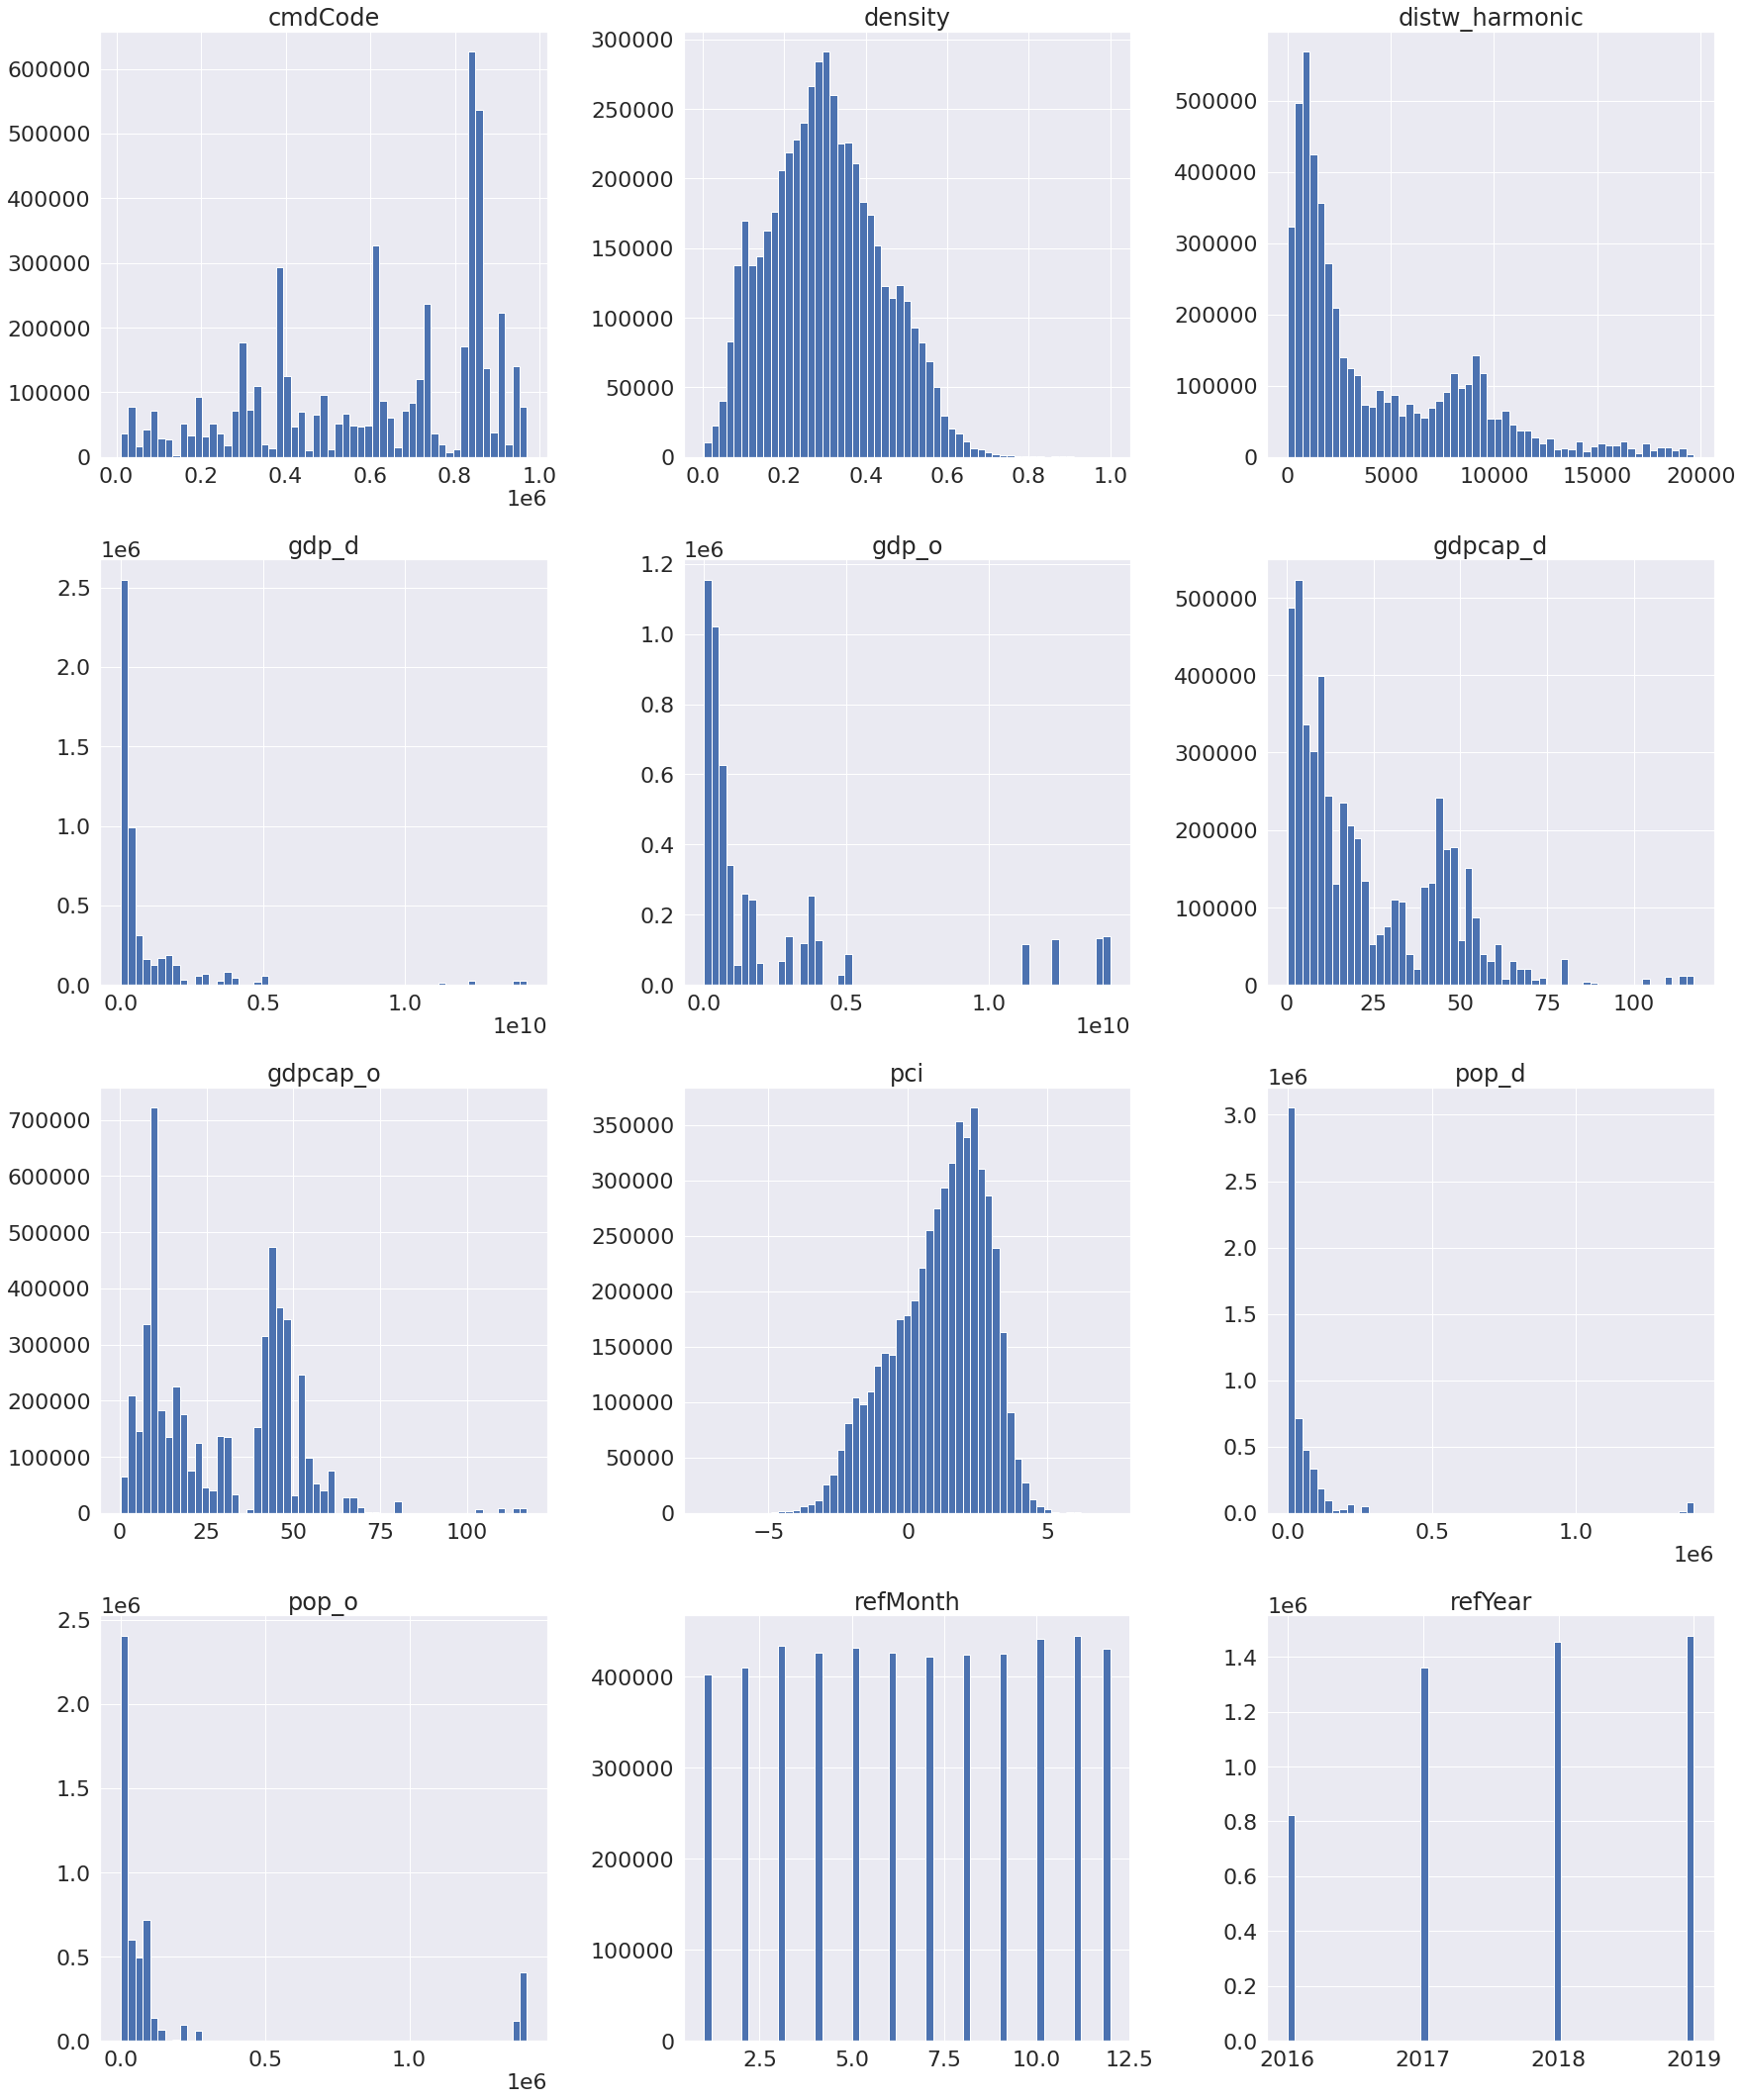

time: 18.3 s


In [35]:
# Set the seaborn font scale and background color
plt.rcParams['axes.facecolor'] = 'white'
sn.set(font_scale=2)

# Sample your data
sampled_data = data[['refYear', 'refMonth', 'distw_harmonic', 'gdp_o', 'gdp_d', 'gdpcap_o', 'gdpcap_d', 'pop_o', 'pop_d', 'cmdCode', 'pci', 'density']].sample(frac=0.05)

# Create a figure and axis for your histogram
fig, ax = plt.subplots(figsize=(25, 30))

# Create the histogram
sampled_data.hist(bins=55, ax=ax)

# Save the figure as EPS
plt.tight_layout()
plt.savefig('distribution.eps', format='eps')

# # Show the plot (optional)
# plt.show()

In [36]:
data[[ 'distw_harmonic', 'gdp_o', 'gdp_d', 'gdpcap_o', 'gdpcap_d', 'pop_o', 'pop_d', 'primaryValue']].sample(frac=0.05)

,distw_harmonic,gdp_o,gdp_d,gdpcap_o,gdpcap_d,pop_o,pop_d,primaryValue
73400237,2738.0,5.353763e+08,1.693114e+09,46.599,11.725,11488.980,144406.265,11859.775
87553186,1087.0,3.430878e+07,1.052844e+08,17.927,19.304,1913.822,5454.147,10409.544
98483372,653.0,5.440811e+08,6.869776e+07,7.814,1.271,69625.580,54045.422,116.142
101264504,6736.0,2.878674e+09,1.035633e+07,43.070,0.820,66836.327,12626.938,116522.501
22807829,2593.0,3.321211e+08,6.715842e+07,57.610,10.205,5764.980,6580.723,7985.874
...,...,...,...,...,...,...,...,...
10307339,9225.0,3.466757e+09,2.026159e+08,41.936,2.186,82667.686,92701.103,438.589
66861072,2538.0,1.420994e+09,1.145744e+07,30.365,4.231,46797.752,2708.214,36264.792
47682771,16169.0,1.389482e+10,1.075620e+08,9.905,6.296,1402760.010,17084.358,49653.000
96902057,1392.0,1.393046e+09,9.101943e+08,29.554,52.476,47134.838,17344.873,373136.508


time: 7.89 s
